In [ ]:
!pip install transformers torch

# TRANSFORMERS

## Vaswani et al. (2017) - Atention is all you need


O artigo "Attention is All You Need" introduz os Transformers, uma arquitetura inovadora para lidar com problemas sequenciais em aprendizado de máquina. Ele aborda limitações das abordagens baseadas em RNNs e LSTMs e propõe uma solução eficiente: o uso exclusivo do mecanismo de atenção.

**Problema principal abordado:** paralelização de dependências de longa distância.

### Transformers

O Transformer é uma arquitetura de rede neural inovadora proposta no artigo "Attention is All You Need". Ele foi projetado para resolver problemas de aprendizado em sequências, como tradução automática, geração de texto e tarefas relacionadas a linguagem e séries temporais.

#### O que o Transformer trouxe de novo?
* Quebra com as abordagens tradicionais: Antes, modelos como RNNs, LSTMs e GRUs eram as principais escolhas para dados sequenciais. Esses modelos processavam sequências palavra por palavra, de forma serial, o que era lento e limitava o aprendizado de dependências de longo alcance.
* Paralelismo:
O Transformer processa toda a sequência de uma vez, graças ao mecanismo de atenção. Isso torna o treinamento muito mais rápido e escalável.
* Foco no Mecanismo de Atenção: Em vez de depender de recorrência (como RNNs) ou convoluções (como CNNs), o Transformer usa atenção para capturar relações entre tokens.

#### Impacto dessa inovação:
* Melhor desempenho em tarefas de NLP, superando abordagens anteriores.
Base para modelos como BERT, GPT e T5.
* Aplicação além de NLP, como visão computacional (Vision Transformers).

### Self-Attention - Atenção auto-regressiva

 Permite que cada palavra (ou token) de uma sequência "preste atenção" em todas as outras palavras da sequência.

#### Como funciona o Self-Attention?
1. Criação de Vetores (Query, Key, Value):
* Cada token da entrada é transformado em três vetores:
  * Query (Q): Representa "o que essa palavra está buscando".
  * Key (K): Representa "o que essa palavra oferece".
  * Value (V): Representa "a informação associada a essa palavra".
2. Cálculo da Similaridade:
* Para cada par de palavras, calcula-se a similaridade entre o Query de uma palavra e o Key das outras.
3. Distribuição de Atenção:
* Os pesos calculados são normalizados com uma softmax para criar uma distribuição de atenção.
4. Soma Ponderada:
* Os pesos de atenção são usados para combinar os Values, criando uma representação contextual.

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

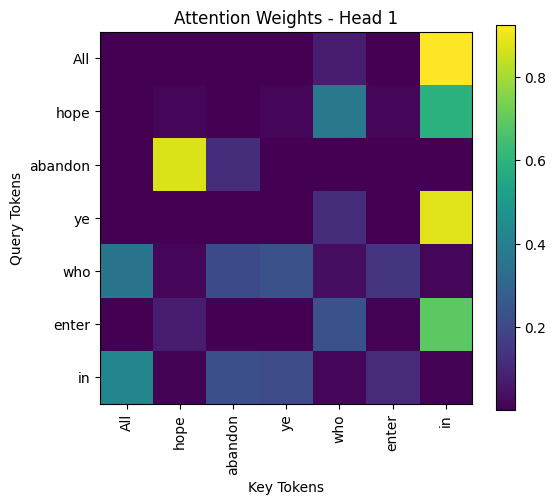

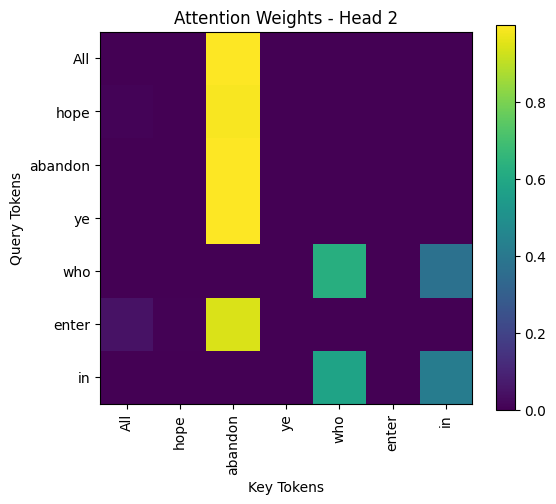

Tokens: ['All', 'hope', 'abandon', 'ye', 'who', 'enter', 'in']

Concatenated Output (Multi-Head Attention):
tensor([[-0.0725, -1.6450,  0.2756, -1.4099],
        [ 2.4973,  1.5139, -0.0195, -1.6297],
        [-1.2921,  2.2425,  0.3260, -1.3605],
        [-1.3923,  2.4683,  4.2575,  1.6948],
        [ 4.2445,  1.7003,  4.2579,  1.6946],
        [ 4.2555,  1.6959, -0.9819, -1.2436],
        [ 4.1447,  1.7303, -1.0678, -1.2298]])


In [ ]:
# Simplificado: sequência e embeddings menores
tokens = ["All", "hope", "abandon", "ye", "who", "enter", "in"]
sequence_length = len(tokens)
embed_size = 4  # Dimensão reduzida para eficiência
num_heads = 2

# Embeddings simulados
embeddings = torch.randn(sequence_length, embed_size)

# Pesos para multi-head attention (2 cabeças)
W_q = torch.randn(num_heads, embed_size, embed_size // num_heads)
W_k = torch.randn(num_heads, embed_size, embed_size // num_heads)
W_v = torch.randn(num_heads, embed_size, embed_size // num_heads)

# Calculando Q, K, V para cada cabeça
Q = torch.einsum("ij,hjk->hik", embeddings, W_q)
K = torch.einsum("ij,hjk->hik", embeddings, W_k)
V = torch.einsum("ij,hjk->hik", embeddings, W_v)

# Atenção escalada para cada cabeça
scores = torch.einsum("hik,hjk->hij", Q, K)
scaled_scores = scores / torch.sqrt(torch.tensor(embed_size // num_heads, dtype=torch.float32))
attention_weights = F.softmax(scaled_scores, dim=-1)

# Aplicação de atenção nos valores
outputs = torch.einsum("hij,hjk->hik", attention_weights, V)
concatenated_output = outputs.view(sequence_length, -1)  # Concatenar saídas de todas as cabeças

# Visualizando os pesos de atenção para cada cabeça
for head in range(num_heads):
    plt.figure(figsize=(6, 5))
    plt.imshow(attention_weights[head].detach().numpy(), cmap="viridis")
    plt.title(f"Attention Weights - Head {head + 1}")
    plt.xlabel("Key Tokens")
    plt.ylabel("Query Tokens")
    plt.xticks(range(sequence_length), tokens, rotation=90)
    plt.yticks(range(sequence_length), tokens)
    plt.colorbar()
    plt.show()

# Exibir o resultado concatenado
print("Tokens:", tokens)
print("\nConcatenated Output (Multi-Head Attention):")
print(concatenated_output)


### Abandono de RNNs e CNNs

#### Limitações de RNNs

Recorrência (RNNs/LSTMs):
* Os modelos processavam sequências de forma serial, palavra por palavra, acumulando informações ao longo do tempo.
* Problema: Ineficiência (dificuldade em paralelizar o treinamento) e dificuldade em capturar dependências de longo alcance.

#### Limitações de CNNsConvolução (CNNs):

* As CNNs processam a entrada em blocos de palavras vizinhas (janelas locais).
* Problema: Embora eficientes, elas capturam relações locais e têm dificuldade em lidar com dependências distantes sem várias camadas.

#### Forma de operação dos Transformers

1. Eliminação de recorrência:
* O Transformer processa toda a sequência de uma vez, sem depender de uma ordem serial.
* Isso melhora a paralelização e reduz o tempo de treinamento.
2. Dispensa convoluções:
* Em vez de usar janelas locais, o mecanismo de atenção examina toda a sequência de entrada diretamente, capturando relações globais.
3. Eficiência Computacional:
* A ausência de recorrência permite que o Transformer use GPUs e TPUs de maneira mais eficiente.
4. Melhor aprendizado:
* Dependências de longo alcance são aprendidas mais facilmente, já que o modelo analisa a sequência como um todo.

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForQuestionAnswering
import torch
import torch.nn as nn
import time

In [ ]:
# Configurações
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sequence_length = 512

# Texto longo (Contexto)
context = """
THROUGH me the way is to the city dolent;
Through me the way is to eternal dole;
Through me the way among the people lost.
Justice incited my sublime Creator;
Created me divine Omnipotence,
The highest Wisdom and the primal Love.
Before me there were no created things,
Only eterne, and I eternal last.
“All hope abandon, ye who enter in!”
These words in sombre colour I beheld
Written upon the summit of a gate;
Whence I: “Their sense is, Master, hard to me!”
And he to me, as one experienced:
“Here all suspicion needs must be abandoned,
All cowardice must needs be here extinct.
We to the place have come, where I have told thee
Thou shalt behold the people dolorous
Who have foregone the good of intellect.”
And after he had laid his hand on mine
With joyful mien, whence I was comforted,
He led me in among the secret things.
"""

In [ ]:
# Pergunta
question = "What words were written upon a gate?"

In [ ]:
# LSTM para Question Answering
class SimpleLSTMForQA(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleLSTMForQA, self).__init__()
        self.embedding = nn.Embedding(30522, input_size)
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc_start = nn.Linear(hidden_size, 1)
        self.fc_end = nn.Linear(hidden_size, 1)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        start_logits = self.fc_start(lstm_out).squeeze(-1)
        end_logits = self.fc_end(lstm_out).squeeze(-1)
        return start_logits, end_logits

hidden_size = 768
lstm_model = SimpleLSTMForQA(hidden_size, hidden_size).to(device)

# Responder à pergunta com LSTM
with torch.no_grad():
    start = time.time()
    lstm_start_logits, lstm_end_logits = lstm_model(input_ids)
    lstm_time = time.time() - start

lstm_start_idx = torch.argmax(lstm_start_logits)
lstm_end_idx = torch.argmax(lstm_end_logits) + 1
lstm_answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[0][lstm_start_idx:lstm_end_idx]))
print(f"LSTM Answer: '{lstm_answer}'")
print(f"LSTM Time: {lstm_time:.4f} seconds")

LSTM Answer: ''
LSTM Time: 0.1487 seconds


In [ ]:
# Transformer (DistilBERT)
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-distilled-squad")
transformer_model = DistilBertForQuestionAnswering.from_pretrained("distilbert-base-uncased-distilled-squad").to(device)

# Tokenização do contexto e pergunta
inputs = tokenizer.encode_plus(question, context, return_tensors="pt", max_length=sequence_length, truncation=True)
input_ids = inputs["input_ids"].to(device)
attention_mask = inputs["attention_mask"].to(device)

# Responder à pergunta com Transformer
with torch.no_grad():
    start = time.time()
    outputs = transformer_model(input_ids, attention_mask=attention_mask)
    start_scores = outputs.start_logits
    end_scores = outputs.end_logits
    transformer_time = time.time() - start

# Identificar a resposta
start_idx = torch.argmax(start_scores)
end_idx = torch.argmax(end_scores) + 1
transformer_answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[0][start_idx:end_idx]))
print(f"Transformer Answer: '{transformer_answer}'")
print(f"Transformer Time: {transformer_time:.4f} seconds")

Transformer Answer: 'sombre colour'
Transformer Time: 0.3569 seconds


### Arquitetura Transformer

#### Noções gerais

##### Estrutura

Codificador-Decodificador:

* **Encoder:** Processa a entrada e cria uma representação abstrata (contexto).
* **Decoder:** Usa a representação do encoder para gerar a saída.

##### Componentes principais:

* **Mecanismo de Atenção:** Permite que o modelo "preste atenção" em partes importantes da entrada.
* **Self-Attention:** Atenção aplicada dentro da sequência (por exemplo, cada palavra prestando atenção nas outras).
* **Scaled Dot-Product Attention:** A fórmula chave para calcular atenção, balanceando foco em diferentes partes.
* **Camadas Feedforward:** Totalmente conectadas, aplicadas após o mecanismo de atenção.
* **Embeddings Posicionais:** Para incluir informações sobre a ordem das palavras, já que o Transformer não processa sequencialmente como RNNs.

#### Embeddings e Positional Encoding

* Embeddings: Cada palavra ou token é transformado em um vetor d-dimensional.
* Positional Encoding: Adicionado ao embedding para incorporar informações sobre a posição na sequência.
$$
PE(pos, 2i) = \sin\left(\frac{pos}{10000^{\frac{2i}{d}}}\right)
$$

$$
PE(pos, 2i+1) = \cos\left(\frac{pos}{10000^{\frac{2i}{d}}}\right)
$$

**Onde:**
- \( pos \): Posição na sequência.
- \( i \): Índice da dimensão do vetor.
- \( d \): Dimensão do vetor de embeddings.
- \( PE \): Codificação posicional.

##### **Entendendo o Conceito**

Quando processamos uma sequência no Transformer, cada token (palavra ou subpalavra) é representado por um vetor de dimensão fixa $(d)$. Por exemplo, se $(d = 512)$, cada token é representado por um vetor de 512 números.

- Cada **posição** dentro desse vetor é identificada por um índice $(i)$, que varia de $(0)$ a $(d-1)$.
- Esse índice $(i)$ é usado nas fórmulas de codificação posicional para calcular um valor de $(\sin)$ ou $(\cos)$ específico para cada dimensão do vetor.

##### **Por que o Índice é Importante?**

O índice $(i)$ determina o comportamento das funções $(\sin)$ e $(\cos)$ em diferentes dimensões do vetor:

- Para **dimensões pares** $(2i)$, usamos $(\sin)$.
- Para **dimensões ímpares** $(2i+1)$, usamos $(\cos)$.

Essa diferenciação cria padrões únicos para cada dimensão, garantindo que a codificação posicional adicione informações sobre a posição $(pos)$ de maneira única e distribuída no vetor.

---

##### **Exemplo Prático**

Se o vetor de dimensão \( d = 6 \), temos os seguintes índices $(i)$:
- Dimensão 0: Índice $( i = 0 )$ (par, usa $(\sin)$).
- Dimensão 1: Índice $( i = 0 )$ (ímpar, usa $(\cos)$).
- Dimensão 2: Índice $( i = 1 )$ (par, usa $(\sin)$).
- Dimensão 3: Índice $( i = 1 )$ (ímpar, usa $(\cos)$).
- Dimensão 4: Índice $( i = 2 )$ (par, usa $(\sin)$).
- Dimensão 5: Índice $( i = 2 )$ (ímpar, usa $(\cos)$).

---

##### **Por que usar seno e cosseno na codificação posicional?**

A codificação posicional com funções trigonométricas ($sin$) e ($cos$) resolve um problema essencial: **como o Transformer entende a ordem dos tokens em uma sequência, se ele processa tudo de maneira paralela?**

---

###### **Motivação**
1. **Transformers não têm noção de sequência:**
   - Redes recorrentes (RNNs) processam os tokens um a um, carregando a ordem da sequência implicitamente no estado oculto.
   - No Transformer, os tokens são processados simultaneamente (em paralelo), então é necessário adicionar explicitamente informações sobre a posição dos tokens.

2. **Solução: Seno e Cosseno**
   - Funções trigonométricas ($sin$) e ($cos$) têm propriedades úteis:
     - **Suavidade**: Os valores mudam de maneira contínua conforme a posição aumenta.
     - **Periodicidade**: Permite que o modelo aprenda dependências tanto locais quanto globais.
     - **Unicidade**: A combinação de ($sin$) e ($cos$) em diferentes dimensões cria representações únicas para cada posição.

---

##### **Fórmulas de Codificação Posicional**

Para cada posição na sequência ($pos$) e dimensão ($i$) no vetor de embeddings ($d$):

1. Para dimensões pares ($2i$):
   $$
   PE(pos, 2i) = \sin\left(\frac{pos}{10000^{\frac{2i}{d}}}\right)
   $$

2. Para dimensões ímpares ($2i+1$):
   $$
   PE(pos, 2i+1) = \cos\left(\frac{pos}{10000^{\frac{2i}{d}}}\right)
   $$

---

##### **Propriedades Úteis**

1. **Dependências de curto e longo alcance:**
   - Dimensões com frequências mais altas (mudanças rápidas em seno/cosseno) representam relações próximas.
   - Dimensões com frequências mais baixas representam relações distantes.

2. **Semântica e Posição:**
   - A codificação posicional é somada ao vetor de embeddings de cada token.
   - Assim, o vetor final combina informações **semânticas** (provenientes do embedding) e **posicionais** (provenientes do seno/cosseno).

---

##### **Exemplo Visual**

Imagine uma sequência de palavras: $["João", "comprou", "carro"]$. Cada palavra tem um vetor de embedding de dimensão $d = 4$:
$$
\text{"João"} \rightarrow [0.5, 1.2, -0.3, 0.8] \\
\text{"comprou"} \rightarrow [-0.1, 0.9, 0.7, -0.4] \\
\text{"carro"} \rightarrow [1.1, -0.6, 0.3, 0.5]
$$

Agora, adicionamos as codificações posicionais:

1. Para $pos = 0$:
   $$
   PE(0) = [\sin(0), \cos(0), \sin(0), \cos(0)] = [0, 1, 0, 1]
   $$

2. Para $pos = 1$:
   $$
   PE(1) = [\sin(1), \cos(1), \sin\left(\frac{1}{10000}\right), \cos\left(\frac{1}{10000}\right)]
   $$

3. Para $pos = 2$:
   $$
   PE(2) = [\sin(2), \cos(2), \sin\left(\frac{2}{10000}\right), \cos\left(\frac{2}{10000}\right)]
   $$

O vetor final para "João" será:

$$
\text{"João"}_{\text{final}} = \text{"João"}_{\text{embedding}} + PE(0) = [0.5, 1.2, -0.3, 0.8] + [0, 1, 0, 1] = [0.5, 2.2, -0.3, 1.8]
$$

---

##### **Por que seno e cosseno são melhores que aprender embeddings de posição?**

1. **Generalização para sequências maiores:**
   - A periodicidade das funções trigonométricas permite que o modelo generalize para comprimentos de sequência maiores do que os vistos durante o treinamento.

2. **Eficiência computacional:**
   - Codificações posicionais baseadas em ($sin$) e ($cos$) podem ser calculadas sem parâmetros adicionais, reduzindo a complexidade do modelo.

3. **Preservação de relações posicionais:**
   - A diferença entre dois vetores codificados posicionalmente (subtração) preserva relações espaciais, o que é útil no mecanismo de atenção.

---

##### **Relação com o Cálculo de Similaridade no Transformer**

O Transformer calcula a atenção entre tokens usando **produto escalar** no mecanismo de atenção:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

- Aqui, $Q$ (query), $K$ (key) e $V$ (value) são derivados dos embeddings de entrada, que já incluem as codificações posicionais.
- O produto escalar entre $Q$ e $K$ mede a similaridade entre os tokens, levando em conta a informação posicional.

---

##### **Resumo**

O uso de ($sin$) e ($cos$) nas codificações posicionais permite ao Transformer:
1. Incorporar informações de posição explicitamente.
2. Aprender relações locais e globais na sequência.
3. Manter eficiência computacional enquanto generaliza para sequências maiores.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


Word Embeddings (Vetores densos de cada palavra):
tensor([[-1.7761,  0.6709,  0.3343, -0.9559, -2.0304,  0.1093],
        [-0.1368, -0.6254, -2.1652,  2.1986,  0.7336, -0.9600],
        [ 1.4455,  1.3308,  1.2523, -0.5760,  0.1271, -0.2086],
        [ 0.8394,  0.1233, -1.3426,  1.5152, -0.4982,  0.6908],
        [ 0.4289, -0.9073,  1.1668,  0.3219, -0.3008,  2.2668],
        [-1.0395,  1.2234, -0.4423, -0.4938,  0.3535, -0.9273],
        [-0.3450,  0.7556, -1.0129,  2.1906, -1.9198, -1.6634]],
       grad_fn=<EmbeddingBackward0>)

Positional Encoding (Padrões senoide e cossenoide únicos para cada posição) 
 	 [seno, cosseno, seno, cosseno, seno, cosseno, seno]:
Senos notáveis. 
 0º = 0 
 30º = 0,5 
 45º = 0,7071 
 60º = 0,8660 
 90º - 1
Cossenos notáveis. 
 0º = 1 
 30º = 0,8660 
 45º = 0,7071 
 60º = 0,5 
 90º - 0
tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957, 

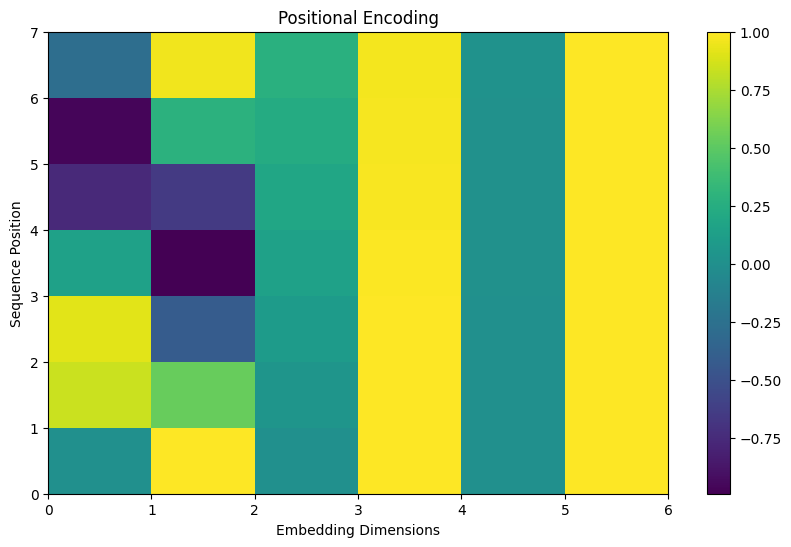

In [ ]:
# Lista de palavras (sequência de entrada)
tokens = ["All", "hope", "abandon", "ye", "who", "enter", "in"]

# 1. Embeddings
vocab_size = 10  # Simulação de um vocabulário pequeno
embed_size = 6  # Dimensão do embedding
embedding_layer = nn.Embedding(vocab_size, embed_size)

# Mapear cada palavra para um índice (simulado)
word_to_idx = {word: i for i, word in enumerate(tokens)}
indices = torch.tensor([word_to_idx[word] for word in tokens])

# Gerar embeddings
embeddings = embedding_layer(indices)
print("Word Embeddings (Vetores densos de cada palavra):")
print(embeddings)

# 2. Positional Encoding
def positional_encoding(seq_len, embed_dim):
    pos = np.arange(seq_len)[:, np.newaxis]  # Posições (0, 1, ..., seq_len-1)
    i = np.arange(embed_dim)[np.newaxis, :]  # Dimensão do embedding (0, 1, ..., embed_dim-1)

    # Fórmula de Vaswani et al.
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / embed_dim)
    angle_rads = pos * angle_rates

    # Aplicar seno e cosseno
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])  # Seno para índices pares
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])  # Cosseno para índices ímpares
    return torch.tensor(angle_rads, dtype=torch.float32)

seq_len = len(tokens)
pos_encoding = positional_encoding(seq_len, embed_size)
print("\nPositional Encoding (Padrões senoide e cossenoide únicos para cada posição) \n \t [seno, cosseno, seno, cosseno, seno, cosseno, seno]:")
print("Senos notáveis. \n 0º = 0 \n 30º = 0,5 \n 45º = 0,7071 \n 60º = 0,8660 \n 90º - 1")
print("Cossenos notáveis. \n 0º = 1 \n 30º = 0,8660 \n 45º = 0,7071 \n 60º = 0,5 \n 90º - 0")
print(pos_encoding)

# 3. Combinação: Embeddings + Positional Encoding
final_representation = embeddings + pos_encoding
print("\nFinal Representation (A soma dos embeddings e do Positional Encoding):")
print(final_representation)

# 4. Visualização do Positional Encoding
plt.figure(figsize=(10, 6))
plt.pcolormesh(pos_encoding.numpy(), cmap="viridis")
plt.colorbar()
plt.title("Positional Encoding")
plt.xlabel("Embedding Dimensions")
plt.ylabel("Sequence Position")
plt.show()


#### Self-Attention

- Calcula dependências entre todas as palavras de uma sequência.
- Três vetores principais:
  - **Query (Q)**: Qual token está "fazendo perguntas"?
  - **Key (K)**: Qual informação está disponível?
  - **Value (V)**: Qual resposta fornecer?
- Cálculo:
  $$
  \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
  $$

#### Multi-Head Attention

- Diversifica o foco do modelo com múltiplas "cabeças" de atenção paralelas.
  - Fórmula:
    
$$
\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \ldots, \text{head}_h)W^O
$$


  - Onde cada cabeça é:
  
    $$
    \text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)
    $$

#### Feed-Forward

A Feedforward Network (FFN) é uma parte essencial de cada camada do Transformer (tanto no encoder quanto no decoder). Após a etapa de **Self-Attention**, cada vetor de token (que contém as informações semânticas e contextuais) é processado individualmente por essa rede.

* **Aplicada individualmente:** A FFN processa cada posição da sequência (ou seja, cada token) de forma independente. Não há troca de informações entre diferentes tokens nessa etapa.
* **Função principal:** Refinar a representação do token gerada pela etapa de atenção.

No Transformer, cada posição na sequência é representada por um vetor. Após a etapa de Self-Attention, cada vetor contém informações contextuais de todas as outras posições na sequência. A FFN:

* **Processa cada vetor separadamente:** Não altera o relacionamento entre os tokens, mas refina as informações contidas em cada vetor individualmente.
* **Paralelismo:** Como cada token é independente, a FFN pode ser aplicada em todos os tokens simultaneamente, aproveitando a capacidade das GPUs.

##### Feedforward Network no Transformer

A **Feedforward Network (FFN)** realiza duas transformações lineares em cada token individualmente:

---

###### Primeira Transformação Linear (Expansão da Dimensão):

$$ z = \text{ReLU}(xW_1 + b_1) $$

- \($ W_1 $): Matriz de pesos da primeira camada.
- \($b_1$): Vetor de bias da primeira camada.
- Dimensão da saída:
  $$
  d_{ff} = 4 \cdot d
  $$

---

###### Segunda Transformação Linear (Redução da Dimensão):

$$
y = zW_2 + b_2
$$

- \($W_2$): Matriz de pesos da segunda camada.
- \($b_2$): Vetor de bias da segunda camada.
- Retorna à dimensão original \($d$).

---

###### Por que essa estrutura é usada?

- **Expansão Temporária**: Permite ao modelo aprender padrões mais complexos em um espaço maior.
- **Redução Final**: Garante compatibilidade com outras partes do modelo e eficiência computacional.

---

###### Exemplo:

Se \($d = 64$) e \($d_{ff} = 256$):
- A entrada é um vetor de dimensão 64.
- A saída da primeira camada será um vetor de dimensão 256.
- A saída final retorna à dimensão 64.


#### Normalização e Drop-out

**Layer Normalization (Norm)** é uma técnica que normaliza os valores em cada **posição do vetor** (ou token) de forma independente, garantindo que todas as dimensões tenham uma média e variância consistentes.

##### **Por que usar Layer Normalization?**
1. **Estabilidade do Treinamento**:
   - Reduz a variabilidade dos valores intermediários em redes profundas, garantindo que os gradientes fluam bem.
2. **Aceleração da Convergência**:
   - Manter os valores normalizados acelera o aprendizado.
3. **Independência de Batch Size**:
   - Ao contrário de **Batch Normalization**, a LayerNorm calcula a média e variância **dentro de cada vetor**, permitindo seu uso em batch sizes pequenos.

##### **Fórmula Matemática**
Dado um vetor de entrada $x$ com $d$ dimensões:

$$
\text{LayerNorm}(x) = \gamma \cdot \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} + \beta
$$

**Onde:**
- $\mu$: Média dos valores em $x$.
- $\sigma^2$: Variância dos valores em $x$.
- $\epsilon$: Pequeno valor para evitar divisão por zero.
- $\gamma$: Fator de escala treinável.
- $\beta$: Fator de deslocamento treinável.

---

#### **Dropout**

**Dropout** é uma técnica de regularização que **desativa aleatoriamente algumas unidades** de uma camada durante o treinamento.

##### **Por que usar Dropout?**
1. **Prevenção de Overfitting**:
   - Desativar unidades obriga o modelo a generalizar melhor.
2. **Regularização Implícita**:
   - Promove redundância no aprendizado ao distribuir a importância entre várias conexões.

##### **Como funciona o Dropout?**
Durante o treinamento:
1. Uma máscara binária $m$ é gerada aleatoriamente para cada unidade.
2. A saída da unidade é multiplicada pela máscara:

$$
y = x \cdot m
$$

No momento da inferência, o Dropout é desativado, e os pesos são escalados por $1 - p$, onde $p$ é a taxa de Dropout.

---

#### **Combinação no Transformer**

1. **Layer Normalization**:
   - Aplicada após o Self-Attention e Feedforward Network para estabilizar as ativações e melhorar o fluxo de gradientes.

2. **Dropout**:
   - Adicionado:
     - Após o Self-Attention (antes da soma residual).
     - Após a Feedforward Network (antes da soma residual).
     - Opcionalmente nos embeddings de entrada.

---

#### **Exemplo Visual**

Considere uma entrada de Self-Attention de 3 tokens, com embeddings de dimensão 4:

$$
x = \begin{bmatrix}
0.5 & 1.2 & -0.3 & 0.8 \\
0.1 & 0.9 & 0.7 & -0.4 \\
1.1 & -0.6 & 0.3 & 0.5
\end{bmatrix}
$$

1. **Layer Normalization**:
   - Para cada linha (token), calcule a média e variância.
   - Normalize os valores:
   
$$x_{\text{norm}} = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}}$$

2. **Dropout**:
   - Durante o treinamento, desative algumas dimensões aleatoriamente:

$$x_{dropout} = \begin{bmatrix}
     0.5 & 0 & -0.3 & 0.8 \\
     0.1 & 0.9 & 0 & -0.4 \\
     0 & -0.6 & 0.3 & 0.5
     \end{bmatrix}
$$

---

#### **Resumo**

1. **Layer Normalization**:
   - Estabiliza o treinamento.
   - Melhora o fluxo de gradientes.
   - Funciona por posição, não por batch.

2. **Dropout**:
   - Reduz overfitting.
   - Promove a generalização.
   - Adicionado após Self-Attention e Feedforward Network.


#### Arquitetura Geral

O Transformer consiste em duas partes principais:

* **Encoder:** Processa a entrada e cria uma representação contextual.
* **Decoder:** Gera a sequência de saída usando a representação do encoder.

Cada parte é composta por **N camadas idênticas**, com dois blocos principais:

* **Mecanismo de Atenção Multi-Head**.
* **Feedforward Position-Wise:** Rede neural densa aplicada individualmente em cada posição.

##### Estrutura Encoder/Decoder

**1. O Papel do Encoder (Codificador)**
O encoder recebe como entrada uma sequência, como uma frase ou parágrafo, e cria uma representação compacta e contextual dessa sequência. Essa representação captura:

  * O significado de cada elemento (token) na sequência.
  * Relações entre tokens (dependências locais e globais).

**Como o Encoder trabalha:**

1. Recebe a entrada: Uma sequência de tokens (como palavras, subpalavras ou caracteres), que são transformados em embeddings numéricos.
2. Adiciona Positional Encodings: Os embeddings são combinados com informações posicionais para preservar a ordem das palavras.
2. Aplica Self-Attention:
  * Cada palavra "presta atenção" em todas as outras da sequência.
  * Calcula dependências de curto e longo alcance entre palavras.
4. Feedforward Network: Após o self-attention, uma rede neural densa refina as representações individuais de cada posição.
5. Repete o processo: Isso é feito por várias camadas de encoder (geralmente 6 ou 12).

**Saída do Encoder:**

  * O encoder retorna uma matriz de vetores que representam o contexto completo da sequência de entrada. Essa matriz será usada pelo decoder para gerar a saída.

**2. O Papel do Decoder (Decodificador)**

O decoder usa a saída do encoder para gerar uma sequência de saída, token por token. Ele é essencial em tarefas onde o modelo precisa criar algo novo, como traduzir uma frase ou responder a uma pergunta.

**Como o Decoder trabalha:**

1. Recebe dois tipos de entrada:
  * A representação do encoder (contexto da entrada).
  * Os tokens gerados até o momento pela própria saída do decoder.
2. Masked Self-Attention:
  * O decoder usa atenção em sua própria saída, mas com máscara para evitar "espiar" tokens futuros (forçando a geração sequencial).
3. Cross-Attention:
  * O decoder presta atenção nos vetores gerados pelo encoder. Isso ajuda a focar partes relevantes da entrada.
4. Feedforward Network:
  * Assim como no encoder, os vetores passam por uma camada densa para refinar a saída.
5. Repete o processo:
  * Este ciclo ocorre por várias camadas do decoder (geralmente 6 ou 12).

**Saída do Decoder:**

  * O decoder gera um vetor que é transformado em uma probabilidade sobre o vocabulário, escolhendo qual token será o próximo na sequência.

**3. Fluxo Completo do Encoder-Decoder**

1. Entrada: O encoder recebe a sequência inicial (ex.: "Eu gosto de aprender").
2. Representação Abstrata: O encoder cria uma representação contextual (ex.: relação entre "Eu" e "gosto").
3. Decoder:
  * Recebe a saída do encoder e o histórico dos tokens gerados.
  * Gera um token de saída por vez (ex.: "I", depois "like", depois "to learn").
4. Repetição: O processo se repete até que o modelo produza o símbolo de parada.

**4. Forma análoga**

* **Encoder:** Imagine que você lê um parágrafo e escreve um resumo para guardar as ideias principais.
* **Decoder:** Usando esse resumo, você cria um texto traduzido ou reescreve o parágrafo com outras palavras.

Por exemplo, na tradução automática de *Eu gosto de aprender* para *I like to learn*:

  * O encoder transforma "Eu gosto de aprender" em uma representação numérica rica.
  * O decoder usa essa representação para gerar "I", "like", "to", e "learn", palavra por palavra, mantendo a coerência com o significado da entrada.
  
Essa separação de responsabilidades é o que torna a arquitetura Encoder-Decoder tão poderosa.

In [ ]:
from transformers import MBartForConditionalGeneration, MBart50Tokenizer

# Carregar o modelo mBART-50
model_name = "facebook/mbart-large-50-many-to-many-mmt"
tokenizer = MBart50Tokenizer.from_pretrained(model_name)
model = MBartForConditionalGeneration.from_pretrained(model_name)

# Configurar o idioma de destino para Português
tokenizer.src_lang = "en_XX"
texts = [
    "Through me the way is to the city of sorrow; through me the way is to eternal woe.",
    "Justice incited my sublime Creator; created me divine Omnipotence.",
    "All hope abandon, ye who enter here!",
    "I love learning about Transformers and natural language processing.",
    "This text will be translated from English to Portuguese using a Transformer model."
]

# Tradução
print("mBART-50 Translations:")
for text in texts:
    inputs = tokenizer(text, return_tensors="pt")
    translated_tokens = model.generate(**inputs, forced_bos_token_id=tokenizer.lang_code_to_id["pt_XX"])
    translated_text = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
    print(f"Original: {text}")
    print(f"Translated: {translated_text}")
    print("-" * 50)


tokenizer_config.json:   0%|          | 0.00/529 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

mBART-50 Translations:
Original: Through me the way is to the city of sorrow; through me the way is to eternal woe.
Translated: Através de mim é o caminho para a cidade da tristeza; Através de mim é o caminho para a maldade eterna.
--------------------------------------------------
Original: Justice incited my sublime Creator; created me divine Omnipotence.
Translated: A justiça incitau o meu sublime Criador; criou-me a Omnipotência divina.
--------------------------------------------------
Original: All hope abandon, ye who enter here!
Translated: Todos abandonem a esperança, vocês que entram aqui!
--------------------------------------------------
Original: I love learning about Transformers and natural language processing.
Translated: Adoro aprender sobre Transformers e processamento de linguagem natural.
--------------------------------------------------
Original: This text will be translated from English to Portuguese using a Transformer model.
Translated: Este texto será traduzid

In [ ]:
from transformers import pipeline

# Configuração do pipeline
# Usamos o pipeline Hugging Face para simplificar o uso do Transformer
classifier = pipeline("sentiment-analysis")

# Exemplos de texto
texts = [
    "I love this product! It's amazing and works perfectly.",
    "This is the worst experience I've ever had. Terrible service.",
    "The movie was okay, not great but not bad either.",
    "Absolutely fantastic! Would highly recommend it to everyone.",
    "I wouldn't recommend this to anyone. It was a waste of money."
]

# Classificação de Sentimentos
print("Sentiment Analysis Results:")
for text in texts:
    result = classifier(text)[0]
    print(f"Text: {text}")
    print(f"Sentiment: {result['label']}, Score: {result['score']:.4f}")
    print("-" * 50)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Sentiment Analysis Results:
Text: I love this product! It's amazing and works perfectly.
Sentiment: POSITIVE, Score: 0.9999
--------------------------------------------------
Text: This is the worst experience I've ever had. Terrible service.
Sentiment: NEGATIVE, Score: 0.9997
--------------------------------------------------
Text: The movie was okay, not great but not bad either.
Sentiment: POSITIVE, Score: 0.9919
--------------------------------------------------
Text: Absolutely fantastic! Would highly recommend it to everyone.
Sentiment: POSITIVE, Score: 0.9999
--------------------------------------------------
Text: I wouldn't recommend this to anyone. It was a waste of money.
Sentiment: NEGATIVE, Score: 0.9998
--------------------------------------------------


# BERT - Bidirectional Encoder Representations for Transformers

## Devlin et al (2018) - BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding

* O artigo apresenta o BERT como o primeiro modelo de linguagem baseado em Transformers totalmente bidirecional.
* Ele destaca as principais inovações do BERT, como:
  * Treinamento bidirecional;
  * Uso de mascaramento de palavras (Masked Language Modeling - MLM);
  * Modelagem de próxima sentença (Next Sentence Prediction - NSP).
* Mostra como o BERT alcançou resultados de ponta em várias tarefas de NLP, como classificação de sentenças e resposta a perguntas.

### 1. O que é o BERT?

* Modelo revolucionário de NLP introduzido pelo Google AI em 2018.
* Pré-treinado em grandes quantidades de texto, como livros e artigos da Wikipedia.
* Seu principal diferencial é a compreensão bidirecional do texto, o que significa que ele analisa uma palavra considerando tanto o contexto anterior quanto o posterior.

* Principais aplicações:

  * Resposta a perguntas: usado em assistentes virtuais para interpretar e responder perguntas.
  * Análise de sentimentos: classifica textos como positivos, negativos ou neutros.
  * Reconhecimento de entidades nomeadas: identifica nomes de pessoas, lugares, organizações, etc.
  * Tradução automática: melhora a qualidade de traduções contextualizadas.

### 2. A base do BERT: Transformer

* O BERT usa apenas o CODIFICADOR do Transformer, que é uma arquitetura introduzida pelo artigo "Attention is All You Need", que possui CODIFICADOR E DECODIFICADOR;
* Como o Transformer funciona:
  * Autoatenção: Identifica quais palavras de uma frase são mais relevantes para entender o significado de uma palavra específica.
      * Exemplo: Em "Ela foi ao parque com seu cachorro", "seu" se refere a "Ela".
  * Codificação: Cria representações vetoriais (embeddings) do texto que capturam o significado contextual das palavras.
* Por usar autoatenção, o BERT captura relações complexas entre palavras em frases longas.

#### Por que o BERT usa apenas o Codificador?

1. Objetivo principal do BERT: Representação contextual

  * O propósito do BERT é criar representações ricas e contextualizadas para palavras em um texto, capturando relações complexas entre elas.
  * O codificador é ideal para isso porque:
    * Ele considera todas as palavras da sequência simultaneamente (graças à autoatenção bidirecional).
    * Isso permite capturar o significado de uma palavra com base em todo o contexto da frase (tanto anterior quanto posterior).

2. Decodificador é desnecessário para o BERT

  * O decodificador do Transformer é usado em tarefas onde há necessidade de gerar texto de saída (por exemplo, tradução automática ou modelos como GPT).
  * No caso do BERT, não é necessário gerar texto. Ele é projetado para tarefas de compreensão, como:
    * Classificação de texto.
    * Resposta a perguntas.
    * Reconhecimento de entidades.
  * Portanto, incluir o decodificador seria redundante e aumentaria desnecessariamente a complexidade computacional.

3. Treinamento bidirecional no codificador

  * O codificador do Transformer no BERT é ajustado para ser bidirecional:
    * Ele processa o texto de entrada olhando para os dois lados (anterior e posterior) de cada palavra.
    * Isso seria incompatível com o decodificador, que geralmente é projetado para processar texto de forma sequencial e unidirecional (da esquerda para a direita).

### 3. Características principais do BERT

1. Pré-treinamento e ajuste fino:
  * Pré-treinado em tarefas gerais e ajustado (fine-tuning) em dados específicos para resolver problemas como análise de texto médico ou busca.
2. Masked Language Modeling (MLM):
  * Durante o treinamento, o modelo "mascara" (oculta) algumas palavras e aprende a prever essas palavras com base no contexto.
  * Exemplo: "O BERT é um [MASK] poderoso." → Predição: "modelo".
3. Next Sentence Prediction (NSP):
  * Ensina o modelo a prever se uma frase segue outra logicamente.
  * Exemplo:
    * Frase 1: "Eu adoro programação."
    * Frase 2: "Por isso, estudei Python."
  * O modelo aprende que há uma relação lógica.

### 4. Como o BERT funciona no pré-treinamento?

1. Masked Language Modeling (MLM):
  *Objetivo: Fazer o modelo entender o contexto das palavras em frases.
  * Técnica: Substituir 15% das palavras por um token especial [MASK].
  * Exemplo:
    * Entrada: "O cachorro está [MASK] no parque."
    * Saída esperada: "brincando".
2. Next Sentence Prediction (NSP):
  * Objetivo: Ensinar o modelo a entender a sequência lógica de sentenças.
  * Técnica:
    * Dado um par de sentenças, identificar se a segunda segue logicamente a primeira.
    * Exemplo:
      * Entrada: ("Eu estou com fome.", "Vou comer algo.") → "Sim"
      * Entrada: ("Eu estou com fome.", "A lua está cheia.") → "Não".

### 5. Estrutura do modelo BERT

A entrada para o modelo BERT é composta por três componentes principais:

1. Tokens:
  * O texto é convertido em tokens, que são palavras ou pedaços de palavras.
  * Exemplo: "brincando" pode ser dividido em ["brinc", "ando"].
2. Segment embeddings:
  * Usados para diferenciar entre duas frases quando o modelo processa pares de sentenças.
3. Position embeddings:
  * Indicam a posição de cada token na frase para preservar a ordem das palavras.

### 6. Ajuste fino para uma tarefa específica

O modelo BERT pré-treinado pode ser ajustado para uma tarefa específica, como classificação de texto, resposta a perguntas ou reconhecimento de entidades nomeadas (NER). Isso é feito adicionando uma camada no topo do modelo e treinando com dados rotulados.

Um EXEMPLO (NÃO É CÓDIGO FINAL PARA PROJETO!) de ajuste fino para classificação de texto

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import os
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset

# Verifique se a GPU está disponível
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Using device: {device}")

# Carregando o tokenizer e o modelo pré-treinado
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)  # Move o modelo para a GPU, se disponível

# Desativando wandb (se não quiser usar)
os.environ["WANDB_DISABLED"] = "true"

# Carregando um dataset de exemplo (imdb para análise de sentimentos)
dataset = load_dataset('imdb')
def tokenize(batch):
    return tokenizer(batch['text'], padding="max_length", truncation=True, max_length=512)

tokenized_dataset = dataset.map(tokenize, batched=True)

# Configurando os argumentos de treinamento
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",  # Avaliação a cada época
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,  # Tamanho do batch para avaliação
    logging_dir='./logs',
    run_name="ajuste_Fino",  # Nome do experimento
    save_strategy="epoch",  # Salvar o modelo por época
    load_best_model_at_end=True,  # Carregar o melhor modelo ao final
    logging_steps=100,  # Registrar logs a cada 100 steps
    evaluation_strategy="epoch",
    save_total_limit=2,  # Limitar o número de checkpoints salvos
    fp16=True  # Habilita cálculo em ponto flutuante de 16 bits para maior eficiência em GPUs compatíveis
)

# Configurando o Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['test'],
)

# Treinando o modelo
trainer.train()


Using device: cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss
1,0.265100,0.318183
2,0.191000,0.241140
3,0.058200,0.321906


TrainOutput(global_step=9375, training_loss=0.20002602447509765, metrics={'train_runtime': 2797.4569, 'train_samples_per_second': 26.81, 'train_steps_per_second': 3.351, 'total_flos': 1.9733329152e+16, 'train_loss': 0.20002602447509765, 'epoch': 3.0})

###7. Treinamento contínuo (Transfer Learning)

Se você tiver um domínio específico, como medicina ou finanças, pode continuar treinando o BERT em um corpus de texto desse domínio antes do ajuste fino.

####Requisitos e Considerações de Formatação

1. Formato do arquivo de texto:

  * O corpus deve estar em formato texto puro (.txt).
  * Cada linha do arquivo representa uma entrada independente para o modelo.

2. Estrutura do texto:

  * Frases devem ser completas e coerentes.
  * O texto não precisa estar tokenizado previamente; o tokenizer do BERT fará isso.
  * Não insira quebras de linha dentro de uma entrada.

In [ ]:
!pip install wandb

In [ ]:
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
!wandb login

In [ ]:
import os
import torch
from transformers import BertTokenizer, BertForMaskedLM, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import load_dataset

# Verifique se a GPU está disponível
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Usando dispositivo: {device}")

# Carregando o modelo e tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained('bert-base-uncased')
model.to(device)  # Move o modelo para a GPU, se disponível

# Carregando um corpus personalizado
dataset = load_dataset('text', data_files={'train': 'seu_corpus.txt'})

# Tokenizando o dataset
def tokenize(batch):
    return tokenizer(batch['text'], padding="max_length", truncation=True, max_length=512, return_special_tokens_mask=True)

tokenized_dataset = dataset.map(tokenize, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(['text'])
tokenized_dataset.set_format(type='torch')

# Adicionando DataCollator para MLM
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=True,
    mlm_probability=0.15
)

# Configurando os argumentos de treinamento
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=8,
    save_steps=10_000,
    save_total_limit=2,
    logging_dir='./logs',
    run_name="custom_dataset",  # Nome do experimento
    fp16=True  # Treinamento em ponto flutuante de 16 bits para GPUs modernas
)

# Configurando o Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    data_collator=data_collator
)

# Treinando o modelo
trainer.train()

model.save_pretrained('./custom_bert')
tokenizer.save_pretrained('./custom_bert')


3. Para tarefas específicas

  * Se o corpus incluir pares de sentenças (como na tarefa de Next Sentence Prediction - NSP), você pode formatar o texto com uma separação explícita (por exemplo, usando tabulação ou separadores). Porém, isso geralmente é desnecessário para transfer learning básico com Masked Language Modeling (MLM).

#####Formatando pares de sentenças para NSP

O corpus deve conter pares de sentenças separados por um tabulador (\t) ou outro delimitador, e um rótulo que indica:

* 1 para "a segunda sentença segue logicamente a primeira".
* 0 para "a segunda sentença não segue a primeira".

`O BERT é amplamente usado em NLP. \t Ele é baseado na arquitetura Transformer. \t	1`

`O modelo foi treinado na Wikipedia. \t É usado para classificação de imagens. \t	0`

`Treinamento de modelos exige GPUs poderosas. \t Grandes datasets são necessários. \t	1`

`O céu está limpo hoje. \t A previsão é de tempestades. \t	0`

`Eu gosto de programar em Python. \t É por isso que estou aprendendo NLP. \t	1`

**Como usar o corpus no Hugging Face**

Após criar o arquivo, você pode carregá-lo usando a biblioteca Hugging Face Datasets:

In [ ]:
import torch
from datasets import load_dataset
from transformers import BertTokenizer, BertForNextSentencePrediction, Trainer, TrainingArguments

# Verifique se a GPU está disponível
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Usando dispositivo: {device}")

# Carregar o corpus formatado para NSP
dataset = load_dataset(
    "csv",
    data_files={"train": "seu_corpus_nsp.txt"},
    delimiter="\t",
    column_names=["sentence_A", "sentence_B", "label"]
)

# Verificar as primeiras linhas para validação
print(dataset['train'][:5])

# Carregar o tokenizer do BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenizar e preprocessar as sentenças
def preprocess(batch):
    tokenized_batch = tokenizer(
        batch["sentence_A"],
        batch["sentence_B"],
        padding="max_length",
        truncation=True,
        max_length=512
    )
    tokenized_batch["labels"] = list(map(int, batch["label"]))  # Converter rótulos para inteiros
    return tokenized_batch

# Aplicar tokenização e preparar dataset
tokenized_dataset = dataset.map(preprocess, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(["sentence_A", "sentence_B", "label"])
tokenized_dataset.set_format(type="torch")

# Carregar o modelo de NSP e mover para o dispositivo
model = BertForNextSentencePrediction.from_pretrained("bert-base-uncased")
model.to(device)

# Configurar argumentos de treinamento
training_args = TrainingArguments(
    output_dir="./results",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=8,
    save_steps=500,
    save_total_limit=2,
    evaluation_strategy="epoch",
    logging_dir="./logs",
    fp16=True,  # Ativar treino em ponto flutuante de 16 bits para GPUs modernas
)

# Configurar o Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
)

# Treinando o modelo
trainer.train()

# Salvar o modelo final
model.save_pretrained("./nsp_model")
tokenizer.save_pretrained("./nsp_model")


###8. Adicionando camadas personalizadas

Para tarefas específicas, como múltiplas classificações ou tarefas multilabel, você pode adicionar camadas personalizadas ao topo do BERT.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertModel, BertTokenizer, AdamW, get_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import time

# Configurações principais
MAX_LEN = 128  # Comprimento máximo dos textos
BATCH_SIZE = 8  # Tamanho do batch
EPOCHS = 3  # Número de épocas
LR = 5e-5  # Taxa de aprendizado

# Definindo o dispositivo (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Classe para o Dataset
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenizando o texto
        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long)
        }

# Modelo personalizado baseado no BERT
class CustomBERTModel(nn.Module):
    def __init__(self, num_labels):
        super(CustomBERTModel, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.pooler_output
        return self.classifier(cls_output)

# Função de treinamento
def train_model(model, data_loader, optimizer, criterion, lr_scheduler):
    model.train()
    total_loss = 0

    for batch in data_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        total_loss += loss.item()

    return total_loss / len(data_loader)

# Função de avaliação
def evaluate_model(model, data_loader):
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs, dim=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(true_labels, predictions)
    return accuracy

# Dados de exemplo (substituir por dados reais)
data = {
    "texts": [
        "O BERT é uma revolução no NLP.",
        "A previsão do tempo indica chuva amanhã.",
        "Python é uma ótima linguagem de programação.",
        "O filme foi incrível e emocionante.",
        "Hoje vou estudar Machine Learning."
    ],
    "labels": [0, 1, 2, 0, 2]  # Classes (0, 1, 2)
}

# Convertendo para DataFrame
df = pd.DataFrame(data)

# Dividindo os dados em treino e teste
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["texts"].values,
    df["labels"].values,
    test_size=0.2,
    random_state=42
)

# Carregando o tokenizer do BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Criando datasets e data loaders
train_dataset = TextDataset(train_texts, train_labels, tokenizer, MAX_LEN)
val_dataset = TextDataset(val_texts, val_labels, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Criando o modelo
model = CustomBERTModel(num_labels=3)  # 3 classes
model = model.to(device)

# Configurando o otimizador e a função de perda
optimizer = AdamW(model.parameters(), lr=LR)
criterion = nn.CrossEntropyLoss()

# Configurando o agendador de taxa de aprendizado
num_training_steps = len(train_loader) * EPOCHS
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

# Loop de treinamento
for epoch in range(EPOCHS):
    start_time = time.time()
    train_loss = train_model(model, train_loader, optimizer, criterion, lr_scheduler)
    val_accuracy = evaluate_model(model, val_loader)
    end_time = time.time()

    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print(f"Treinamento: Loss = {train_loss:.4f}")
    print(f"Validação: Accuracy = {val_accuracy:.4f}")
    print(f"Tempo: {end_time - start_time:.2f} segundos\n")

# Salvar o modelo e tokenizer
torch.save(model.state_dict(), "bert_model.pth")
tokenizer.save_pretrained("bert_tokenizer")

# Testando com novos dados
test_texts = ["A previsão do tempo é para amanhã.", "BERT é um modelo poderoso."]
test_dataset = TextDataset(test_texts, [0, 0], tokenizer, MAX_LEN)  # Labels fictícios
test_loader = DataLoader(test_dataset, batch_size=1)

# Predizendo classes
model.eval()
predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs, dim=1)
        predictions.extend(preds.cpu().numpy())

print(f"Predições: {predictions}")


# BERTimbau - Souza, Nogueira e Lotufo (2020)

Variante do BERT ajustada especificamente para Processamento de Linguagem Natural (NLP) em português, e foi desenvolvido pela comunidade científica brasileira. O BERTimbau é treinado com dados em português, como a Wikipedia em português, livros e outros textos de domínio público.

## Diferenciais do BERTimbau

1. Idioma nativo: Foi treinado exclusivamente para lidar com os desafios do português, como flexões verbais e diferenças de gênero e número.
2. Baseado no BERT original: Segue a mesma arquitetura do BERT, mas com corpus específico para o português.
3. Modelos disponíveis:
  * `bert-base-portuguese-cased`: Sensível a maiúsculas/minúsculas.
  * `bert-base-portuguese-uncased`: Não sensível a maiúsculas/minúsculas.

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, pipeline

# Carregar o modelo para Masked Language Modeling
model = AutoModelForMaskedLM.from_pretrained('neuralmind/bert-base-portuguese-cased')
tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased', do_lower_case=False)

Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more det

In [ ]:
# Configurar o pipeline
pipe = pipeline('fill-mask', model=model, tokenizer=tokenizer)

# Usar o pipeline para preencher a máscara
result = pipe('Tinha uma [MASK] no meio do caminho.')
for prediction in result:
    print(f"Palavra: {prediction['token_str']}, Probabilidade: {prediction['score']}")

Palavra: pedra, Probabilidade: 0.14287830889225006
Palavra: árvore, Probabilidade: 0.06213388964533806
Palavra: estrada, Probabilidade: 0.05514999106526375
Palavra: casa, Probabilidade: 0.02991880290210247
Palavra: cruz, Probabilidade: 0.02566048502922058


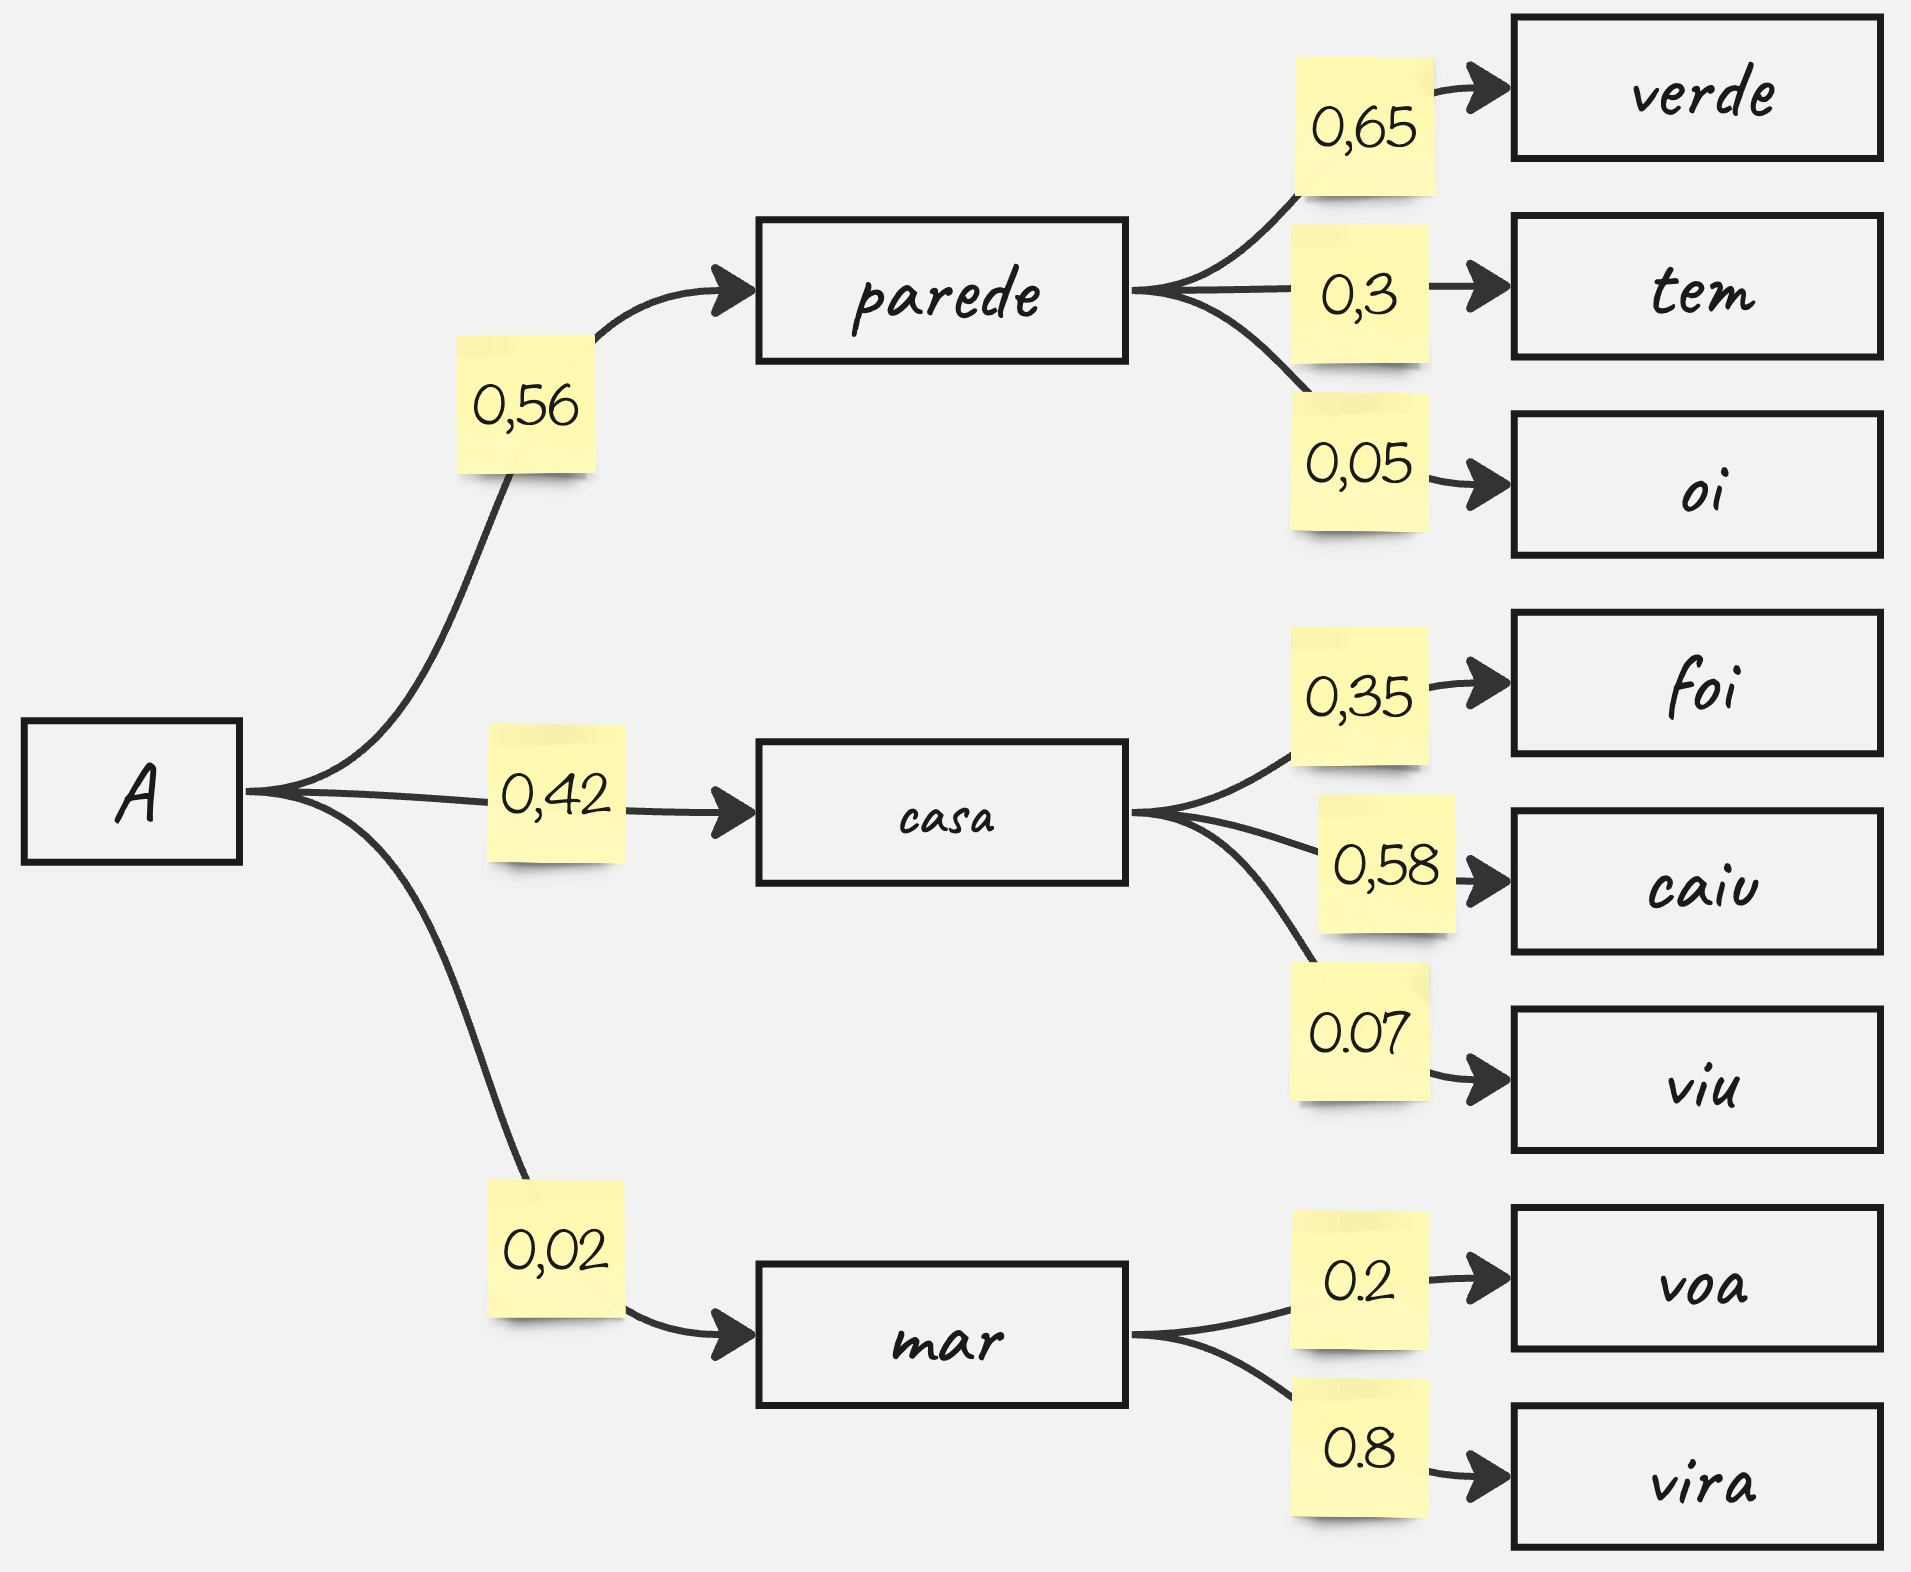

## 1. Classificação de textos com BERTimbau

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset, DatasetDict
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Configurações gerais
MODEL_NAME = "neuralmind/bert-base-portuguese-cased"  # Modelo BERTimbau
BATCH_SIZE = 8
NUM_EPOCHS = 3
MAX_LEN = 128

# Verificar se GPU está disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Dados de exemplo (substituir por dados reais)
data = {
    "train": [
        {"text": "O BERT é ótimo para NLP em português!", "label": 0},
        {"text": "Hoje vai chover à tarde.", "label": 1},
        {"text": "Python é uma excelente linguagem.", "label": 2},
    ],
    "validation": [
        {"text": "A previsão do tempo é de sol amanhã.", "label": 1},
        {"text": "Estou aprendendo Machine Learning.", "label": 2},
    ],
}

# Convertendo os dados para DatasetDict
train_dataset = Dataset.from_list(data["train"])
validation_dataset = Dataset.from_list(data["validation"])
dataset = DatasetDict({"train": train_dataset, "validation": validation_dataset})

# Carregando o tokenizer do modelo BERTimbau
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Função para tokenizar os textos
def tokenize_function(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=MAX_LEN)

# Tokenizando os datasets
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Configurar colunas para treinamento
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

# Carregando o modelo pré-treinado com número de classes definido
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model.to(device)  # Move o modelo explicitamente para a GPU

# Configurar os argumentos de treinamento
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=NUM_EPOCHS,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="epoch",
    load_best_model_at_end=True,
    save_total_limit=2,
)

# Função para calcular métricas de avaliação
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# Configurar o Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Treinar o modelo
trainer.train()

# Avaliação final
metrics = trainer.evaluate()
print("Métricas de avaliação:", metrics)

# Predição em novos textos
new_texts = ["O tempo está ensolarado.", "Aprender NLP é muito interessante."]
new_encodings = tokenizer(new_texts, padding="max_length", truncation=True, max_length=MAX_LEN, return_tensors="pt")
new_encodings = {key: val.to(device) for key, val in new_encodings.items()}  # Move as entradas para GPU

# Modelo em modo de avaliação
model.eval()
with torch.no_grad():
    outputs = model(**new_encodings)
    predictions = torch.argmax(outputs.logits, dim=1)

print(f"Predições: {predictions.cpu().numpy()}")


## 2. Usando NER em Spacy 3.0 com BERTimbau

Primeiro, conforme já explicado no projeto 3, é necessário contruir um modelo de identificação de entidades nomeadas (NER):

In [ ]:
! pip install spacy
! python -m spacy download pt_core_news_lg

In [ ]:
# Configurar spaCy para usar GPU
spacy.require_gpu()
print("Usando GPU:", spacy.prefer_gpu())

In [ ]:
import random
from spacy.util import minibatch, compounding
from spacy.training import Example
from spacy.training import offsets_to_biluo_tags

In [ ]:
nlp = spacy.load("pt_core_news_lg")

In [ ]:
# Adiciona o NER ao pipeline do spaCy (caso ainda não esteja)
if "ner" not in nlp.pipe_names:
    ner = nlp.create_pipe("ner")
    nlp.add_pipe(ner, last=True)
else:
    ner = nlp.get_pipe("ner")

In [ ]:
TRAINING_DATA = [
    ("A Apple lançou o novo iPhone.", {"entities": [(22, 28, "PRODUCT")]}),
    ("O novo iPhone 12 é o mais recente modelo.", {"entities": [(8, 17, "PRODUCT")]}),
    ("A Samsung apresentou o Galaxy S21.", {"entities": [(23, 33, "PRODUCT")]}),
    ("A Microsoft anunciou o novo Surface Laptop.", {"entities": [(28, 42, "PRODUCT")]}),
    ("A Google lançou o Pixel 5.", {"entities": [(19, 26, "PRODUCT")]}),
    ("O iPad Pro foi apresentado em 2021.", {"entities": [(2, 10, "PRODUCT")]}),
    ("O novo PlayStation 5 será lançado em breve.", {"entities": [(7, 19, "PRODUCT")]})
]

In [ ]:
# Add new labels to the NER
for _, annotations in TRAINING_DATA:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])

In [ ]:
# Disable other pipes during training (we only want to train NER)
with nlp.disable_pipes(*[pipe for pipe in nlp.pipe_names if pipe != "ner"]):
    # Initialize the optimizer
    optimizer = nlp.begin_training()

    # Training the model for more epochs
    for iteration in range(100):  # Train for more iterations
        random.shuffle(TRAINING_DATA)
        losses = {}

        # Create batches of training data using minibatch
        batches = minibatch(TRAINING_DATA, size=compounding(4.0, 32.0, 1.001))

        for batch in batches:
            examples = []
            for text, annotations in batch:
                doc = nlp.make_doc(text)
                try:
                    example = Example.from_dict(doc, annotations)
                except ValueError:
                    print(f"Skipping misaligned entities in: '{text}'")
                    continue
                examples.append(example)

            # Update the model
            nlp.update(examples, sgd=optimizer, drop=0.35, losses=losses)

        print(f"Iteration {iteration} Losses: {losses}")

        # Early stopping condition (stop if losses are minimal or don't improve)
        if losses.get("ner", 0) < 0.01:
            print(f"Early stopping at iteration {iteration}")
            break

# Save the trained model
nlp.to_disk("custom_ner_model")

Depois, dotado do modelo enriquecido, carregamos este modelo para juntar ao potencial do BERT:

In [ ]:
import spacy
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import DatasetDict, Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Configurações
MODEL_NAME = "neuralmind/bert-base-portuguese-cased"  # Modelo BERTimbau
MAX_LEN = 128
BATCH_SIZE = 8
NUM_EPOCHS = 3

# Verificar GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# 1. Carregar o SpaCy para NER em português
nlp = spacy.load("custom_ner_model")  # Modelo de NER customizado com novas entidades

# Função para extrair entidades e combinar com o texto
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return text + " " + " ".join(entities)

# Dados de exemplo (substituir pelos seus dados)
data = {
    "train": [
        {"text": "A previsão do tempo é chuva em São Paulo.", "label": 0},
        {"text": "Python é usado para análise de dados.", "label": 1},
        {"text": "O filme foi incrível e emocionante.", "label": 0},
    ],
    "validation": [
        {"text": "Hoje vou para o Rio de Janeiro.", "label": 0},
        {"text": "Machine Learning é uma área promissora.", "label": 1},
    ],
}

# Pré-processar os textos com SpaCy para NER
for split in data:
    for item in data[split]:
        item["text"] = extract_entities(item["text"])

# Convertendo para o formato Hugging Face Dataset
dataset = DatasetDict({
    "train": Dataset.from_dict({"text": [item["text"] for item in data["train"]],
                                "label": [item["label"] for item in data["train"]]}),
    "validation": Dataset.from_dict({"text": [item["text"] for item in data["validation"]],
                                     "label": [item["label"] for item in data["validation"]]}),
})

# 2. Tokenizar os textos usando o BERTimbau
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=MAX_LEN)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Ajustar colunas para o modelo
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

# 3. Configurar o modelo
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)  # 2 classes neste exemplo
model.to(device)  # Mover o modelo para a GPU

# 4. Configurar os argumentos de treinamento
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=BATCH_SIZE,
    num_train_epochs=NUM_EPOCHS,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
)

# Função de métricas personalizada
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# 5. Configurar o Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Treinar o modelo
trainer.train()

# 6. Avaliar o modelo
metrics = trainer.evaluate()
print("Métricas de avaliação:", metrics)

# 7. Predizer novos textos
new_texts = ["Amanhã irei para Salvador.", "Deep Learning está avançando rapidamente."]
new_texts_with_entities = [extract_entities(text) for text in new_texts]  # Extraindo entidades dos novos textos

# Tokenizar os textos
new_encodings = tokenizer(new_texts_with_entities, padding=True, truncation=True, max_length=MAX_LEN, return_tensors="pt")
new_encodings = {key: val.to(device) for key, val in new_encodings.items()}  # Mover para GPU

# Predição
model.eval()
with torch.no_grad():
    outputs = model(**new_encodings)
    predictions = torch.argmax(outputs.logits, dim=1)

print("Textos:", new_texts)
print("Predições:", predictions.tolist())
